# Import Library: 분석에 사용할 모듈 설치
**1. Import Library**

In [1]:
!python -m pip install --user --upgrade pip

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

# Data Loading: 분석에 사용할 데이터 불러오기
**1. Import Library**  
**2. Data Loading**

In [3]:
# Regression Data (Using Library)
from sklearn.datasets import load_boston
raw = load_boston()
print(raw.DESCR)
print(raw.keys())
print(raw.data.shape, raw.target.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df_X = pd.DataFrame(raw.data, columns=raw.feature_names)
df_Y = pd.DataFrame(raw.target, columns=['Price'])
df_library = pd.concat([df_Y, df_X], axis=1)
df_library

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48


In [5]:
# Regression Data (Using Direct Location)
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,'18',2.31,'0',0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,'0',7.07,'0',0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,'0',7.07,'0',0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,'0',2.18,'0',0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,'0',2.18,'0',0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,'0',11.93,'0',0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,'0',11.93,'0',0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,'0',11.93,'0',0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,'0',11.93,'0',0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


# Preprocessing: 데이터 정리 및 패턴 추출하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   

## 자료형 변환

|   변수  |              설명              |
|:-------:|:------------------------------:|
|  Price  |            주택 가격           |
|   CRIM  |        1인당 범죄 발생률       |
|    ZN   |       주택용 토지의 비율       |
|  INDUS  |      비소매 상업지역 비율      |
|   CHAS  |    찰스강 인접 여부(인접=1)    |
|   NOX   |         일산화질소 농도        |
|    RM   |            방의 개수           |
|   AGE   | 1940년 이전에 건축된 주택 비율 |
|   DIS   |     주요 5대 회사와의 거리     |
|   RAD   |         고속도로 접근성        |
|   TAX   |             재산세             |
| PTRATIO |       교사와 학생의 비율       |
|    B    |         흑인 거주 비율         |
|  LSTAT  |          저소득층 비율         |

In [6]:
# 데이터 확인
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    object 
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 55.5+ KB


In [7]:
col = []
if df['ZN'].dtype == 'object':
    for i in df['ZN']:
        col.append(float(i[1:-1]))
    df['ZN'] = col

col = []
if df['CHAS'].dtype == 'object':
    for i in df['CHAS']:
        col.append(float(i[1:-1]))
    df['CHAS'] = col

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 결측값 처리

In [9]:
# 결측값 확인
df.isnull()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Price       0
CRIM       11
ZN          0
INDUS      33
CHAS        0
NOX         0
RM          2
AGE         0
DIS        57
RAD         0
TAX         0
PTRATIO     0
B           2
LSTAT      17
dtype: int64

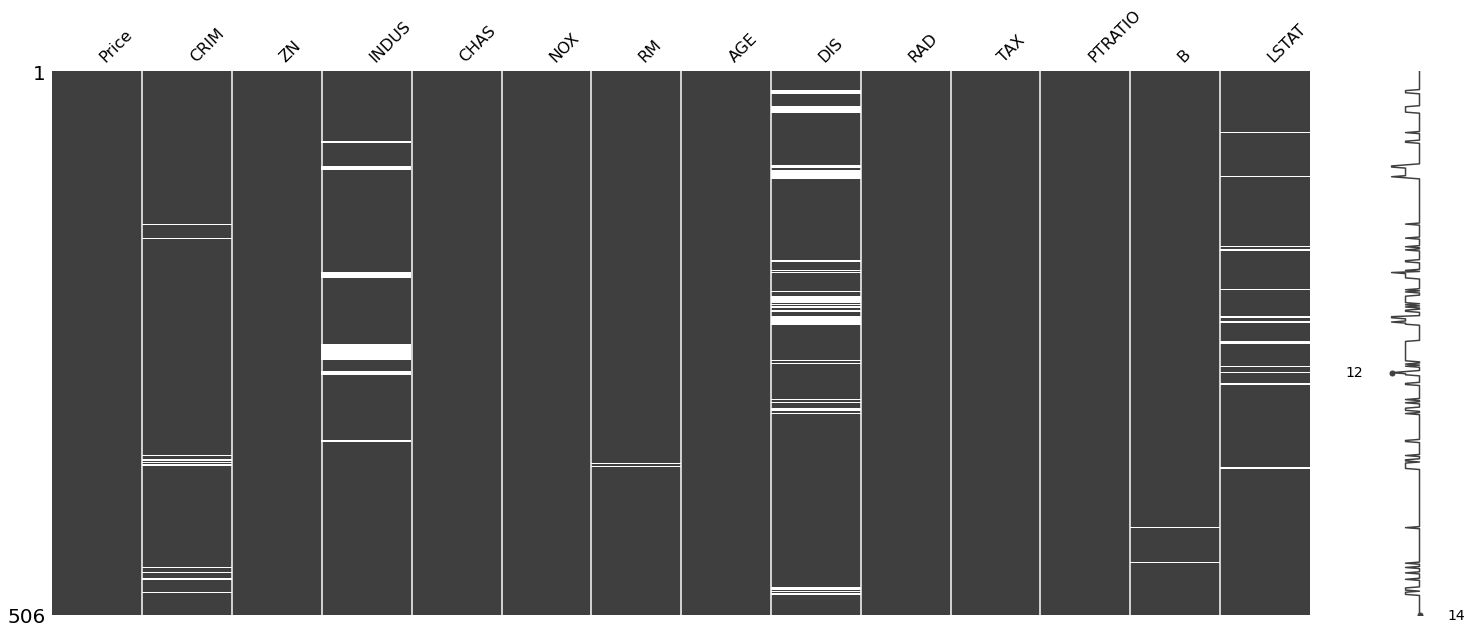

In [11]:
import missingno as msno

msno.matrix(df)
plt.show()

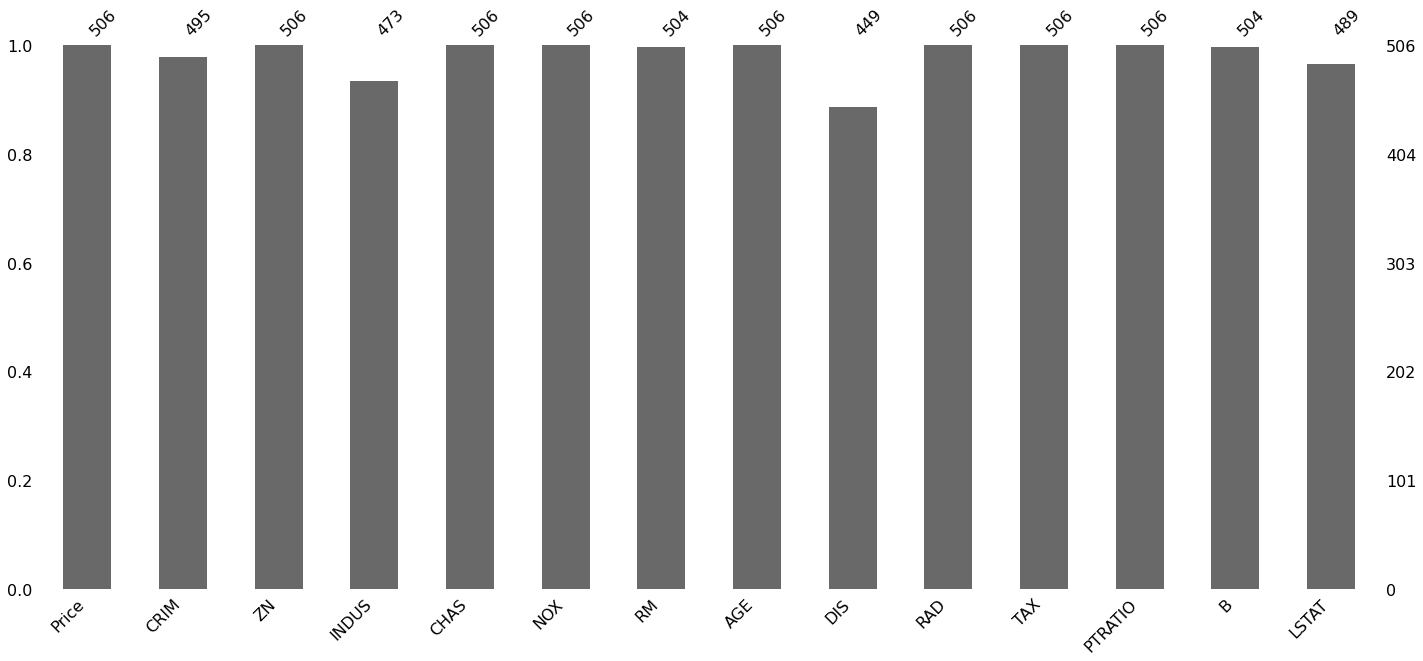

In [12]:
msno.bar(df)
plt.show()

In [13]:
df.dropna(axis=1)

,Price,ZN,CHAS,NOX,AGE,RAD,TAX,PTRATIO
0,24.00,18.00,0.00,0.54,65.20,1,296,15.30
1,21.60,0.00,0.00,0.47,78.90,2,242,17.80
2,34.70,0.00,0.00,0.47,61.10,2,242,17.80
3,33.40,0.00,0.00,0.46,45.80,3,222,18.70
4,36.20,0.00,0.00,0.46,54.20,3,222,18.70
...,...,...,...,...,...,...,...,...
501,22.40,0.00,0.00,0.57,69.10,1,273,21.00
502,20.60,0.00,0.00,0.57,76.70,1,273,21.00
503,23.90,0.00,0.00,0.57,91.00,1,273,21.00
504,22.00,0.00,0.00,0.57,89.30,1,273,21.00


In [14]:
df.dropna(axis=0)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [15]:
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [16]:
df.fillna(df.mean()).isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

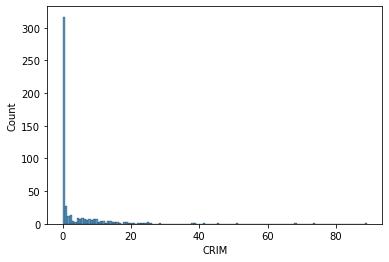

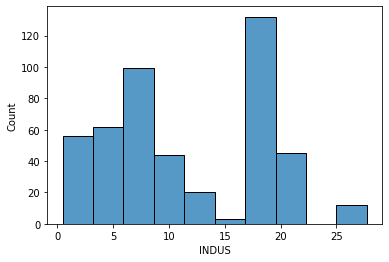

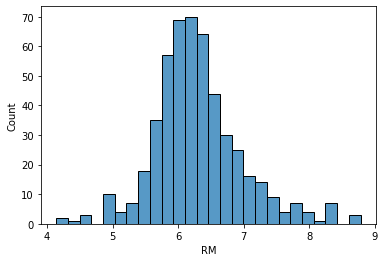

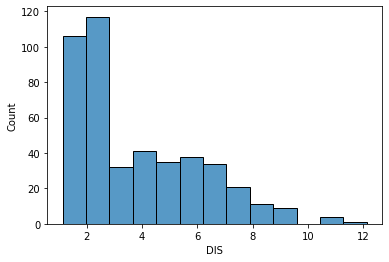

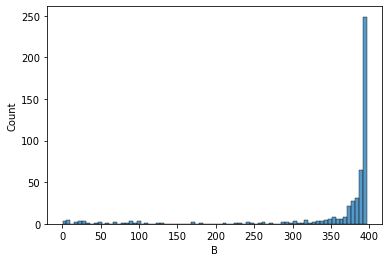

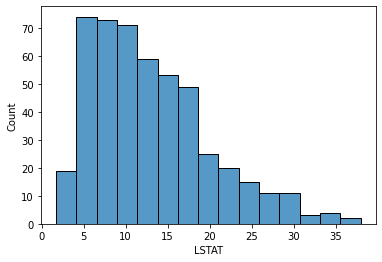

In [17]:
for i in df.columns[df.isnull().sum() != 0]:
    sns.histplot(data=df, x=i)
    plt.show()

In [18]:
for i in df.columns[df.isnull().sum() != 0]:
    if i not in ['INDUS', 'RM']:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [19]:
df.isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

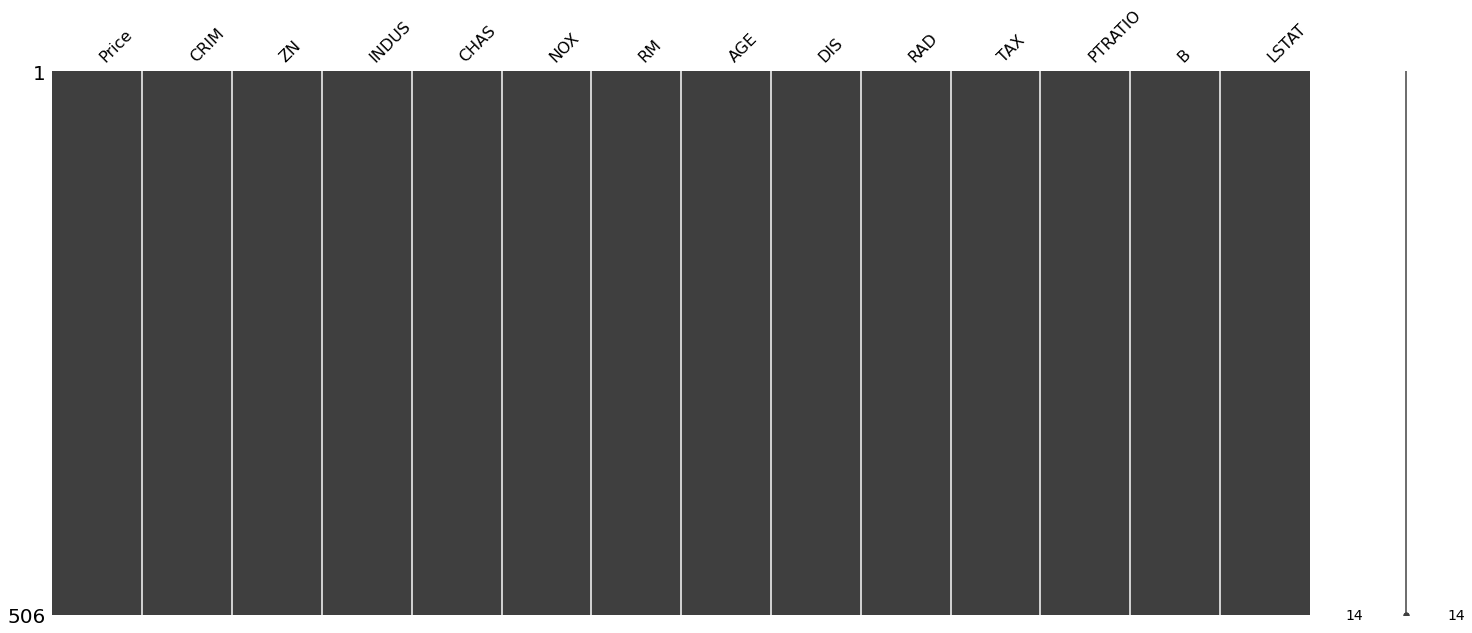

In [20]:
msno.matrix(df)
plt.show()

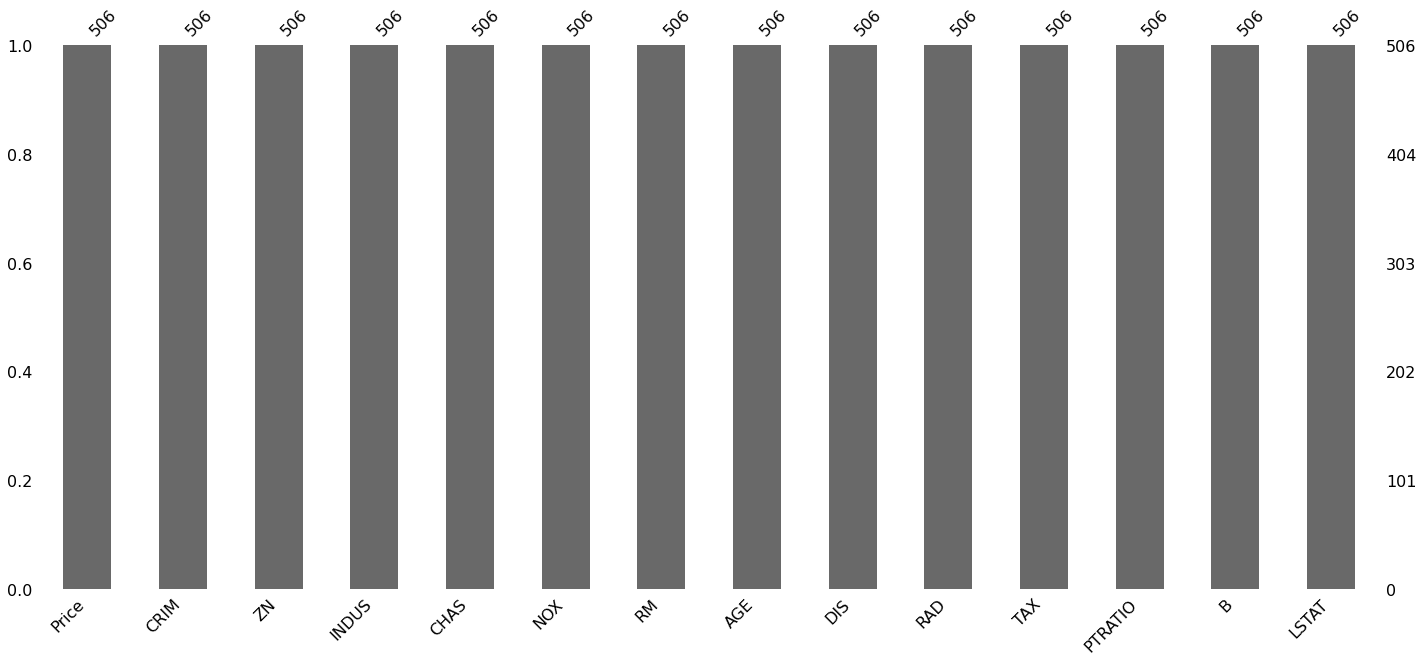

In [21]:
msno.bar(df)
plt.show()

## 이상치 처리

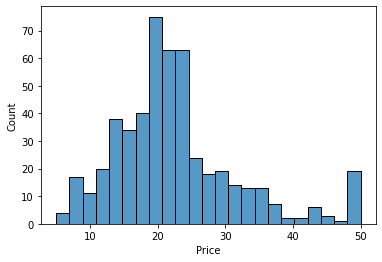

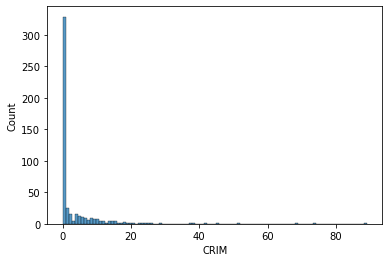

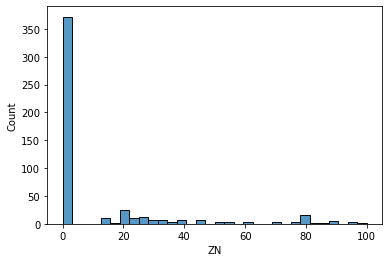

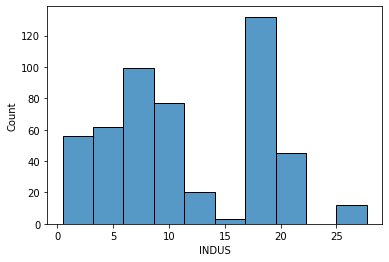

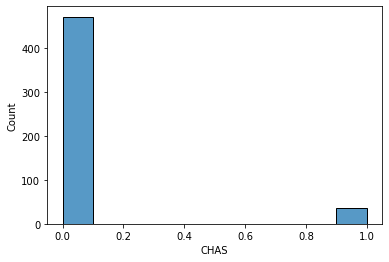

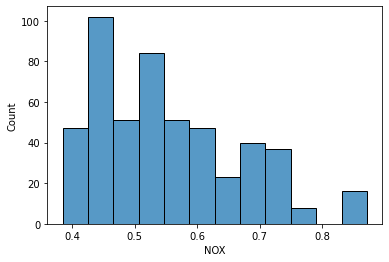

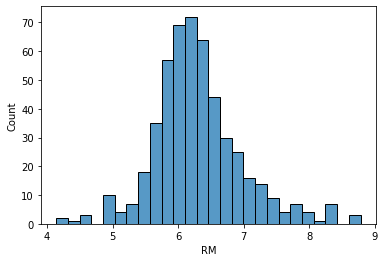

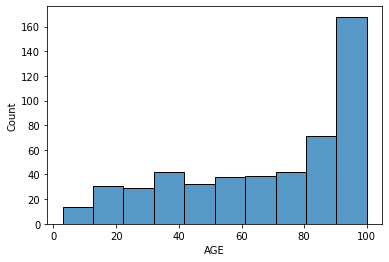

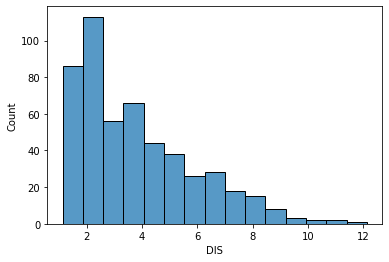

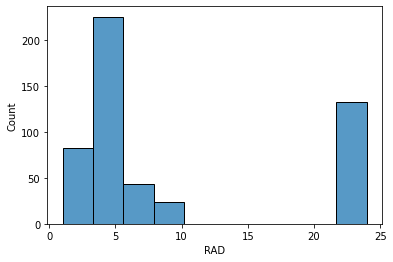

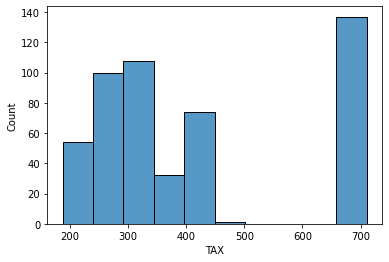

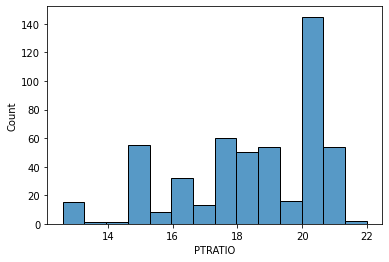

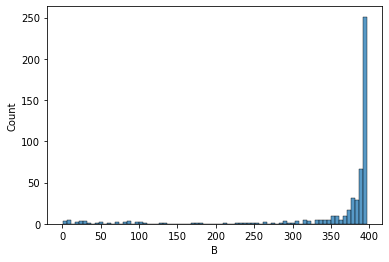

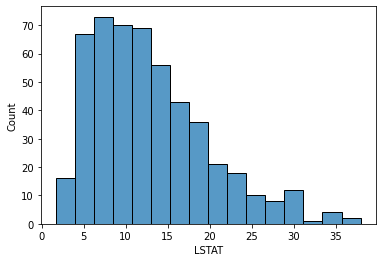

In [22]:
for i in df.columns:
    sns.histplot(data=df, x=i)
    plt.show()

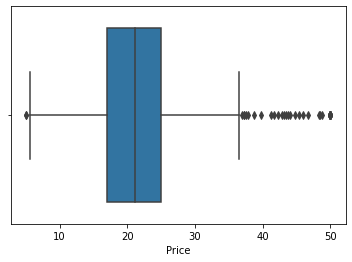

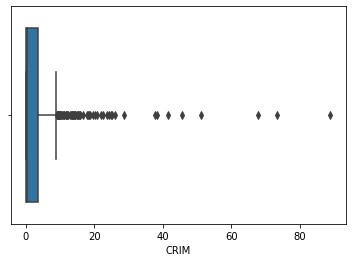

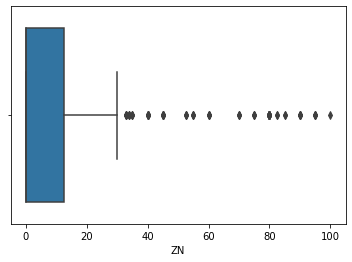

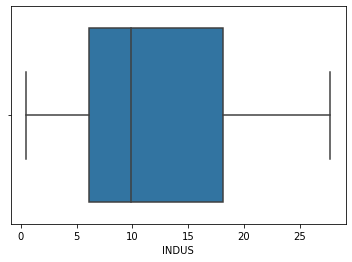

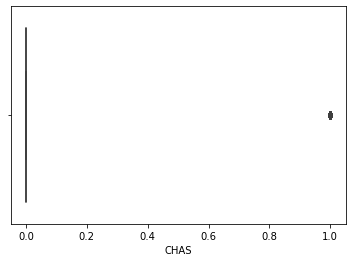

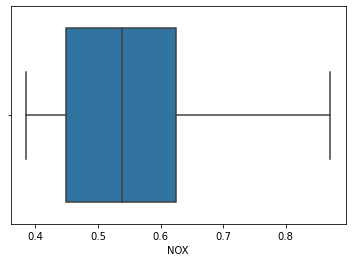

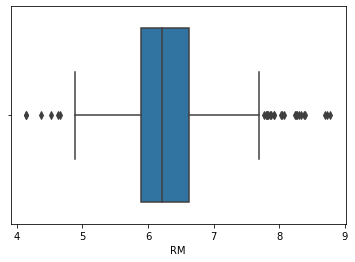

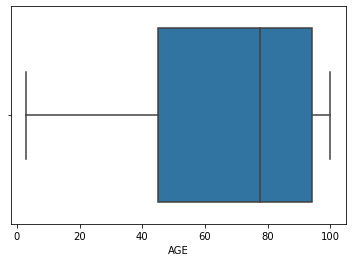

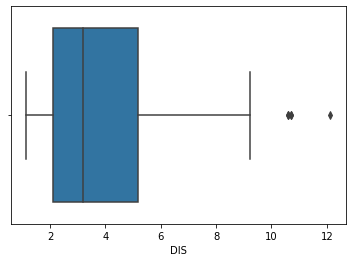

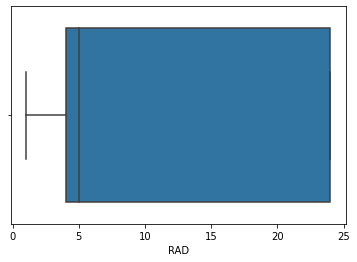

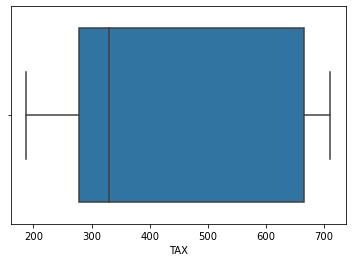

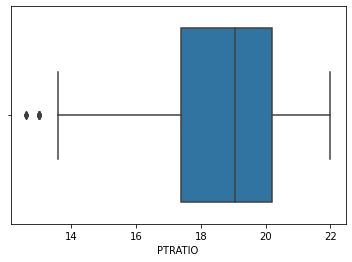

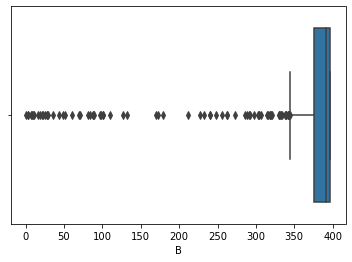

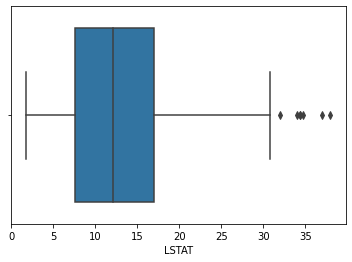

In [23]:
for i in df.columns:
#     sns.histplot(data=df, x=i)
    sns.boxplot(x=i, data=df)
    plt.show()

## 데이터 변환

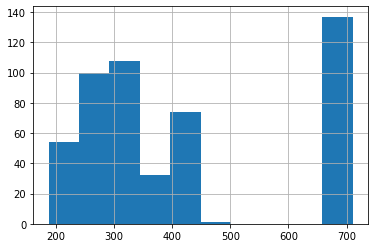

In [24]:
# Binning
df.TAX.hist()
plt.show()

In [25]:
df.TAX.describe()

count   506.00
mean    408.24
std     168.54
min     187.00
25%     279.00
50%     330.00
75%     666.00
max     711.00
Name: TAX, dtype: float64

In [26]:
interval = [100, 200, 300, 400, 500, 600, 700, 800]
if df['TAX'].max() >= 700:
    df['TAX'] = np.digitize(df['TAX'], bins=interval)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,506.00,22.53,9.20,5.00,17.02,21.20,25.00,50.00
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.61,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.54,6.58,0.46,6.08,9.90,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.29,0.68,4.14,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.82,2.10,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00


In [27]:
pd.get_dummies(df['TAX'])

,1,2,3,4,6,7
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
501,0,1,0,0,0,0
502,0,1,0,0,0,0
503,0,1,0,0,0,0
504,0,1,0,0,0,0


In [28]:
pd.get_dummies(df['TAX'], prefix='TAX_')

,TAX__1,TAX__2,TAX__3,TAX__4,TAX__6,TAX__7
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
501,0,1,0,0,0,0
502,0,1,0,0,0,0
503,0,1,0,0,0,0
504,0,1,0,0,0,0


In [29]:
pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)

,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
501,1,0,0,0,0
502,1,0,0,0,0
503,1,0,0,0,0
504,1,0,0,0,0


In [30]:
df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
if 'TAX_7' not in df.columns:
    df = pd.concat([df, df_dummy], axis=1)

df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,2,15.30,396.90,4.98,1,0,0,0,0
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,2,17.80,396.90,9.14,1,0,0,0,0
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,2,17.80,392.83,4.03,1,0,0,0,0
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,2,18.70,394.63,2.94,1,0,0,0,0
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,2,18.70,396.90,5.33,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,2,21.00,391.99,9.67,1,0,0,0,0
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,2,21.00,396.90,9.08,1,0,0,0,0
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,2,21.00,396.90,5.64,1,0,0,0,0
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,2,21.00,393.45,6.48,1,0,0,0,0


In [31]:
if 'TAX' in df.columns:
    del df['TAX']

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,506.00,22.53,9.20,5.00,17.02,21.20,25.00,50.00
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.61,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.54,6.58,0.46,6.08,9.90,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.29,0.68,4.14,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.82,2.10,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00


In [32]:
df['CHAS'].unique()

array([0., 1.])

In [33]:
df['CHAS'] = df['CHAS'].astype(int)
df['CHAS'].unique()

array([0, 1])

In [34]:
df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
if 'CHAS_1' not in df.columns:
    df = pd.concat([df, df_dummy], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,506.00,22.53,9.20,5.00,17.02,21.20,25.00,50.00
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.61,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.54,6.58,0.46,6.08,9.90,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.29,0.68,4.14,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.82,2.10,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00


In [35]:
if 'CHAS' in df.columns:
    del df['CHAS']

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,506.00,22.53,9.20,5.00,17.02,21.20,25.00,50.00
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.61,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.54,6.58,0.46,6.08,9.90,18.10,27.74
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.29,0.68,4.14,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.82,2.10,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
PTRATIO,506.00,18.46,2.16,12.60,17.40,19.05,20.20,22.00


### Code Summary1

In [36]:
def prep1(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


def prep2(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 700:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)

    df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
    if 'TAX_7' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'TAX' in df.columns:
        del df['TAX']

    df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
    if 'CHAS_1' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'CHAS' in df.columns:
        del df['CHAS']
    
    return df

In [37]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep1(df)
df_prep = prep2(df)

In [38]:
display(df, df_prep)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


,Price,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
0,24.00,0.01,18.00,2.31,0.54,6.58,65.20,4.09,1,15.30,396.90,4.98,1,0,0,0,0,1,0
1,21.60,0.03,0.00,7.07,0.47,6.42,78.90,4.97,2,17.80,396.90,9.14,1,0,0,0,0,1,0
2,34.70,0.03,0.00,7.07,0.47,7.18,61.10,4.97,2,17.80,392.83,4.03,1,0,0,0,0,1,0
3,33.40,0.03,0.00,2.18,0.46,7.00,45.80,6.06,3,18.70,394.63,2.94,1,0,0,0,0,1,0
4,36.20,0.07,0.00,2.18,0.46,7.15,54.20,6.06,3,18.70,396.90,5.33,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.57,6.59,69.10,2.48,1,21.00,391.99,9.67,1,0,0,0,0,1,0
502,20.60,0.05,0.00,11.93,0.57,6.12,76.70,2.29,1,21.00,396.90,9.08,1,0,0,0,0,1,0
503,23.90,0.06,0.00,11.93,0.57,6.98,91.00,2.17,1,21.00,396.90,5.64,1,0,0,0,0,1,0
504,22.00,0.11,0.00,11.93,0.57,6.79,89.30,2.39,1,21.00,393.45,6.48,1,0,0,0,0,1,0


## 데이터 분리

In [39]:
Y_colname = ['Price']
X_colname = [x for x in df_prep.columns if x not in Y_colname]
Y_colname, X_colname

(['Price'],
 ['CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'PTRATIO',
  'B',
  'LSTAT',
  'TAX_2',
  'TAX_3',
  'TAX_4',
  'TAX_6',
  'TAX_7',
  'CHAS_0.0',
  'CHAS_1.0'])

In [40]:
train_test_split(df_prep[X_colname], df_prep[Y_colname],
                 test_size=0.2, random_state=123)

[     CRIM    ZN  INDUS  NOX   RM    AGE  DIS  RAD  PTRATIO      B  LSTAT  \
 203  0.04 95.00   2.68 0.42 7.85  33.20 5.12    4    14.70 392.78  12.97   
 441  9.72  0.00  18.10 0.74 6.41  97.20 2.07   24    20.20 385.96  19.52   
 172  0.14  0.00   4.05 0.51 5.57  88.50 2.60    5    16.60 396.90  14.69   
 95   0.12  0.00   2.89 0.45 6.62  57.80 3.82    2    18.00 357.98   6.65   
 54   0.01 75.00   4.00 0.41 5.89  47.60 7.32    3    21.10 396.90  14.80   
 ..    ...   ...    ...  ...  ...    ...  ...  ...      ...    ...    ...   
 98   0.08  0.00   2.89 0.45 7.82  36.90 3.82    2    18.00 393.53  12.97   
 476  4.87  0.00  18.10 0.61 6.48  93.60 2.31   24    20.20 396.21  18.68   
 322  0.35  0.00   7.38 0.49 6.04  49.90 4.72    5    19.60 396.90   7.70   
 382  9.19  0.00  18.10 0.70 5.54 100.00 1.58   24    20.20 396.90  23.60   
 365  4.56  0.00  18.10 0.72 6.21  87.90 1.61   24    20.20 354.70   7.12   
 
      TAX_2  TAX_3  TAX_4  TAX_6  TAX_7  CHAS_0.0  CHAS_1.0  
 203      1 

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df_prep[X_colname], df_prep[Y_colname],
                                                    test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 18) (404, 1)
(102, 18) (102, 1)


In [42]:
display(X_train, Y_train)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


### Code Summary2

In [43]:
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df_prep[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [44]:
Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [45]:
Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df_prep, Y_colname)

(404, 18) (404, 1)
(102, 18) (102, 1)


## 스케일 조정

```python
preprocessing.StandardScaler()
preprocessing.MinMaxScaler()
preprocessing.RobustScaler()
preprocessing.Normalizer()
```

In [46]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train)
scaler_fit.transform(X_train)

array([[3.23480261e-04, 9.50000000e-01, 8.13782991e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09226403e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.49286478e-03, 0.00000000e+00, 1.31598240e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.87569366e-03, 0.00000000e+00, 2.53665689e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03188854e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.11358451e-02, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [47]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train)
pd.DataFrame(scaler_fit.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [48]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train)
pd.DataFrame(scaler_fit.transform(X_train), columns=X_train.columns)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [49]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train)
X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                              index=X_test.index, columns=X_test.columns)

In [50]:
display(X_train_scaling, X_test_scaling)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


### Code Summary3

In [51]:
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [52]:
scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

In [53]:
display(X_train, X_test)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0.0,CHAS_1.0
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [54]:
display(X_train.describe().T, X_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.04,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.35,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.24,0.19,0.00,0.08,0.18,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
CRIM,102.00,0.04,0.09,0.00,0.00,0.00,0.04,0.57
ZN,102.00,0.12,0.25,0.00,0.00,0.00,0.12,0.95
INDUS,102.00,0.40,0.22,0.03,0.24,0.35,0.65,0.92
NOX,102.00,0.34,0.24,0.01,0.13,0.31,0.49,1.00
RM,102.00,0.47,0.15,0.00,0.38,0.46,0.55,1.01
AGE,102.00,0.65,0.31,-0.03,0.40,0.74,0.93,1.00
DIS,102.00,0.25,0.18,-0.00,0.09,0.24,0.38,0.69
RAD,102.00,0.38,0.39,0.00,0.13,0.17,1.00,1.00
PTRATIO,102.00,0.62,0.24,0.00,0.48,0.69,0.81,0.91
B,102.00,0.89,0.23,0.01,0.92,0.98,1.00,1.00


## Code Summary

In [55]:
def prep1(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


def prep2(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 700:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)

    df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
    if 'TAX_7' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'TAX' in df.columns:
        del df['TAX']

    df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
    if 'CHAS_1' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'CHAS' in df.columns:
        del df['CHAS']
    
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df_prep[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [56]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep1(df)
df = prep2(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

(404, 18) (404, 1)
(102, 18) (102, 1)


# Applying Base Algorithm: Y예측을 위한 Base분석 실행
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   

In [57]:
# description of train X
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.04,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.35,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.24,0.19,0.00,0.08,0.18,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 203 to 365
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      404 non-null    float64
 1   ZN        404 non-null    float64
 2   INDUS     404 non-null    float64
 3   NOX       404 non-null    float64
 4   RM        404 non-null    float64
 5   AGE       404 non-null    float64
 6   DIS       404 non-null    float64
 7   RAD       404 non-null    float64
 8   PTRATIO   404 non-null    float64
 9   B         404 non-null    float64
 10  LSTAT     404 non-null    float64
 11  TAX_2     404 non-null    float64
 12  TAX_3     404 non-null    float64
 13  TAX_4     404 non-null    float64
 14  TAX_6     404 non-null    float64
 15  TAX_7     404 non-null    float64
 16  CHAS_0.0  404 non-null    float64
 17  CHAS_1.0  404 non-null    float64
dtypes: float64(18)
memory usage: 60.0 KB


In [59]:
# LinearRegression (using statsmodels)
algo_reg1 = sm.OLS(Y_train, X_train).fit()
algo_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.71e-105
Time:                        23:08:46   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0.0      24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1.0      26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
algo_reg1.predict(X_train)

203   40.40
441   18.21
172   21.04
95    27.31
54    17.58
       ... 
98    34.08
476   21.18
322   22.03
382   12.87
365   21.97
Length: 404, dtype: float64

In [61]:
algo_reg1.predict(X_test)

410   11.03
85    26.93
280   36.55
422   16.02
199   32.45
       ... 
229   28.35
159   25.14
196   36.58
345   16.81
467   16.87
Length: 102, dtype: float64

In [62]:
pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

In [63]:
display(pred_tr_reg1, pred_te_reg1)

array([40.39643951, 18.21488541, 21.03813534, 27.30984301, 17.57856533,
       17.91529534, 15.11408636, 22.7573486 , 25.71398032, 19.86419775,
       14.96395086, 20.16487091, 19.87650501, 27.99686347, 28.51562143,
       13.59648455, 21.13307783, 18.74937343, 14.51430055, 36.03346138,
       20.10658512, 10.17720253, 11.58309733, 23.76546313, 24.33233668,
       20.0946819 , 14.86738204, 21.51220217, 23.06508539, 17.36778571,
       17.81646201,  5.91988628, 12.10288725, 17.16608353, 16.47799056,
       18.41507643, 16.37812738, 19.10993419, 23.246847  , 24.44059562,
       16.21768371, 22.14863224, 31.37753625, 15.43565489, 24.10323218,
       15.62550933, 25.53867567, 16.49932032, 15.22810432, 22.58023454,
       35.63889845, 27.51696556, 30.61949572, 18.84928044, 19.69689668,
       34.61746264, 27.80293475, 20.97871822, 20.80030091, 25.69546747,
       38.91778865,  0.65888127, 12.3000675 , 44.43592494, 18.41133175,
       36.08551998, 22.12705086,  9.60481325, 31.34561833, 26.74

array([1.10252897e+01, 2.69291471e+01, 3.65548958e+01, 1.60212025e+01,
       3.24546469e+01, 4.00495699e+01, 2.36839696e+01, 1.20378437e+01,
       1.45858386e+01, 3.27699938e+01, 2.78218271e+01, 1.80828645e+01,
       1.37243955e+01, 2.93212799e+01, 1.89300858e+01, 2.04689343e+01,
       2.17778980e+01, 3.74672985e+01, 1.74088696e+01, 1.41070671e+01,
       1.31628136e+01, 2.17163809e+01, 3.69514084e+01, 3.95742468e+01,
       2.61746553e+01, 2.21551535e+01, 1.74301707e+01, 2.10519018e+01,
       2.20064544e+01, 1.93341478e+01, 2.62639764e+01, 3.27148336e+01,
       1.31828137e+01, 2.06289445e+01, 2.43559659e+01, 3.50445606e+01,
       2.72776825e+01, 1.88999762e+01, 1.30956756e+01, 3.91467211e+01,
       3.25844596e+01, 1.86575703e+01, 1.65720161e+01, 4.00419051e+01,
       9.56944745e+00, 2.66831969e+01, 1.76260110e+01, 2.25987364e+01,
       1.47805758e+01, 2.65857685e+01, 3.13890398e+01, 2.77192949e+01,
       1.79715545e+01, 1.26844156e+01, 2.26526135e+01, 1.79819200e+01,
      

## Code Summary

In [64]:
# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.71e-105
Time:                        23:08:46   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0.0      24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1.0      26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation: 분석 성능 확인/평가하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  

In [65]:
pred_te_reg1

array([1.10252897e+01, 2.69291471e+01, 3.65548958e+01, 1.60212025e+01,
       3.24546469e+01, 4.00495699e+01, 2.36839696e+01, 1.20378437e+01,
       1.45858386e+01, 3.27699938e+01, 2.78218271e+01, 1.80828645e+01,
       1.37243955e+01, 2.93212799e+01, 1.89300858e+01, 2.04689343e+01,
       2.17778980e+01, 3.74672985e+01, 1.74088696e+01, 1.41070671e+01,
       1.31628136e+01, 2.17163809e+01, 3.69514084e+01, 3.95742468e+01,
       2.61746553e+01, 2.21551535e+01, 1.74301707e+01, 2.10519018e+01,
       2.20064544e+01, 1.93341478e+01, 2.62639764e+01, 3.27148336e+01,
       1.31828137e+01, 2.06289445e+01, 2.43559659e+01, 3.50445606e+01,
       2.72776825e+01, 1.88999762e+01, 1.30956756e+01, 3.91467211e+01,
       3.25844596e+01, 1.86575703e+01, 1.65720161e+01, 4.00419051e+01,
       9.56944745e+00, 2.66831969e+01, 1.76260110e+01, 2.25987364e+01,
       1.47805758e+01, 2.65857685e+01, 3.13890398e+01, 2.77192949e+01,
       1.79715545e+01, 1.26844156e+01, 2.26526135e+01, 1.79819200e+01,
      

In [66]:
Y_train

,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


In [67]:
Y_train.values.flatten()

array([48.5, 17.1, 23.1, 28.4, 18.9, 13. , 17.2, 24.1, 18.5, 21.8, 13.3,
       23. , 14.1, 23.9, 24. , 17.2, 21.5, 19.1, 20.8, 36. , 20.1,  8.7,
       13.6, 22. , 22.2, 21.1, 13.4, 17.4, 20.1, 10.2, 23.1, 10.2, 13.1,
       14.3, 14.5,  7.2, 19.6, 20.6, 22.7, 26.4,  7.5, 20.3, 50. ,  8.5,
       20.3, 16.1, 22. , 19.6, 10.2, 23.2, 35.2, 25. , 36.2, 16.1, 10.9,
       36.4, 25. , 20.1, 16.8, 23.7, 42.3, 17.9, 12.7, 50. , 18.4, 33.4,
       22.9, 14.6, 29.9, 22.6, 22.5, 29. , 50. , 37.9, 21.4, 29.4, 20.3,
       23. , 30.1, 21.7, 36.5, 25. , 24.5, 37.3, 33.8, 24.7, 32.7, 23.1,
       25.1, 21.7, 13.4, 24.8, 12.7, 11.8,  8.3, 20.2, 41.3, 23.2, 23.1,
       24.3, 19.3, 10.8, 18.6, 29. , 23.9, 19.5, 13.1, 31.7, 21. , 18.2,
       21. , 21.2, 14.1, 33.2, 13.8, 19.9, 21.7, 20.6, 21.2, 13.6, 18.9,
       18. , 24.1, 28.7, 23.4, 15.2, 23.6, 13.8, 11.7, 16.3, 50. , 13.5,
       50. , 31.5, 22.6, 12.1, 21.7, 14.1, 22.4, 13.4, 33.1, 20.6,  8.3,
       36.2,  6.3, 21.5, 23.3, 24. , 19.1, 29.6, 27

In [68]:
MAE = abs(Y_train.values.flatten() - pred_tr_reg1).mean()
MSE = ((Y_train.values.flatten() - pred_tr_reg1)**2).mean()
MAPE = (abs(Y_train.values.flatten() - pred_tr_reg1)/Y_train.values.flatten()*100).mean()
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,3.07,21.05,16.33


## Code Summary

In [69]:
### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    
    return Score, Residual

### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte, Residual_tr, Residual_te

In [70]:
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1)
Score_reg1

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


# Error Analysis: 분석모형이 데이터패턴을 모두 추출하여 분석을 종료해도 되는지 판단하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  
**6. Error Analysis**  

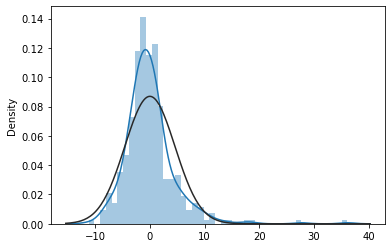

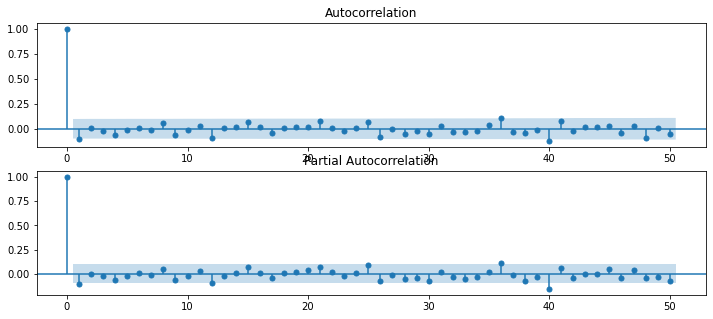

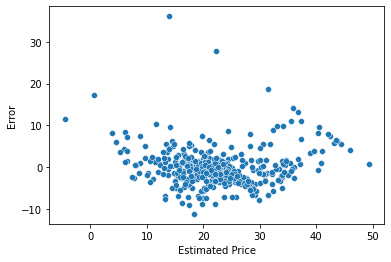

In [71]:
##### Error Analysis(Plot)
# Normal Distribution Analysis
sns.distplot(Resid_tr_reg1, norm_hist='True', fit=stats.norm)
plt.show()

# Autocorrelation Analysis
figure, axes = plt.subplots(2,1,figsize=(12,5))
sm.graphics.tsa.plot_acf(Resid_tr_reg1, lags=50, use_vlines=True, ax=axes[0])
sm.graphics.tsa.plot_pacf(Resid_tr_reg1, lags=50, use_vlines=True, ax=axes[1])
plt.show()

# Heteroscedasticity Analysis
temp = pd.concat([pd.DataFrame(pred_tr_reg1, columns=['Estimated Price']),
                  Resid_tr_reg1.reset_index().iloc[:,[1]]], axis=1)
sns.scatterplot(x='Estimated Price', y='Error', data=temp)
plt.show()

In [72]:
##### Error Analysis(Statistics)
# Checking of Normality
# Null Hypothesis: The residuals are normally distributed
Normality = pd.DataFrame([stats.shapiro(Resid_tr_reg1)], 
                         index=['Normality'], columns=['Test Statistics', 'p-value']).T

# Checking for Autocorrelation
# Null Hypothesis: Autocorrelation is absent
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1, lags=[10,50])[0], columns=['Test Statistics']),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1, lags=[10,50])[1], columns=['p-value'])], axis=1).T
Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

# Checking Heteroscedasticity
# Null Hypothesis: Error terms are homoscedastic
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr_reg1, X_train.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'], 
                                  columns=['Test Statistics', 'p-value', 'Alternative']).T
Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
Error_Analysis

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


## Code Summary

In [73]:
### Error analysis
def error_analysis(X_Data, Y_Estimated, Residual, graph_on=False):
    if graph_on == True:
        ##### Error Analysis(Plot)
        # Normal Distribution Analysis
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Residual, lags=50, use_vlines=True, ax=axes[1])
        plt.show()

        # Heteroscedasticity Analysis
        temp = pd.concat([pd.DataFrame(Y_Estimated, columns=['Estimated Price']),
                          Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Estimated Price', y='Error', data=temp)
        plt.show()

    ##### Error Analysis(Statistics)
    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Error_Analysis
    
    return Error_Analysis

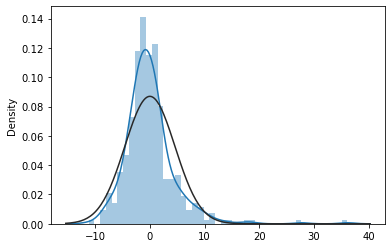

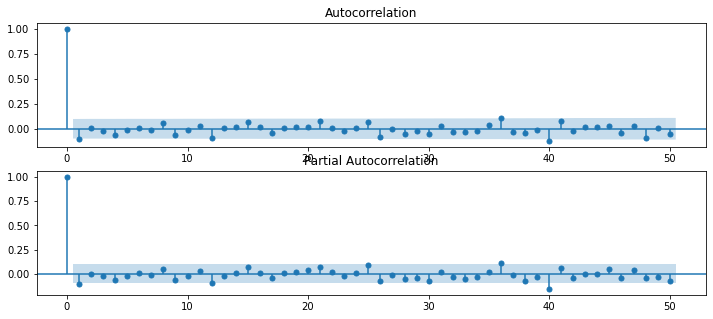

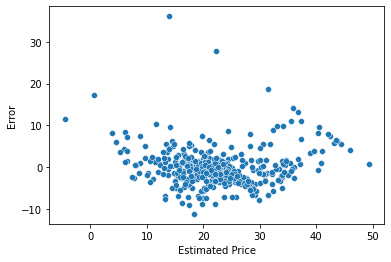

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


In [74]:
error_analysis(X_train, pred_tr_reg1, Resid_tr_reg1, graph_on=True)

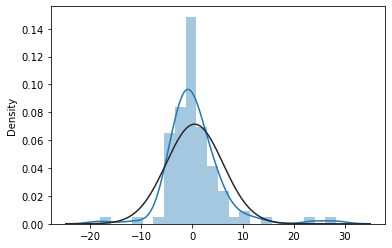

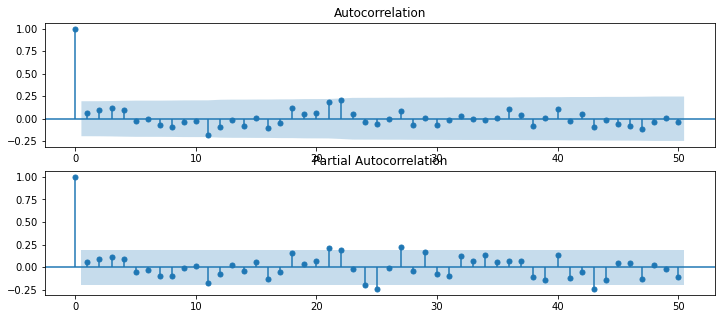

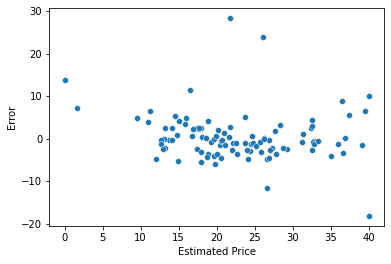

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.83,5.77,41.83,0.13
p-value,0.00,0.83,0.79,0.00
Alternative,nan,nan,nan,two-sided


In [75]:
error_analysis(X_test, pred_te_reg1, Resid_te_reg1, graph_on=True)

# Summary: insufficient for me
**1) 데이터 핸들링**  

**2) 단계이해**  
>**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  
**6. Error Analysis**  

**3) 결과 해석**  

## Customized Function

In [76]:
### Preprocessing
def prep1(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


def prep2(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 700:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)

    df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
    if 'TAX_7' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'TAX' in df.columns:
        del df['TAX']

    df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
    if 'CHAS_1' not in df.columns:
        df = pd.concat([df, df_dummy], axis=1)

    if 'CHAS' in df.columns:
        del df['CHAS']
    
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df_prep[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling


### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    
    return Score, Residual

### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte, Residual_tr, Residual_te


### Error analysis
def error_analysis(X_Data, Y_Estimated, Residual, graph_on=False):
    if graph_on == True:
        ##### Error Analysis(Plot)
        # Normal Distribution Analysis
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Residual, lags=50, use_vlines=True, ax=axes[1])
        plt.show()

        # Heteroscedasticity Analysis
        temp = pd.concat([pd.DataFrame(Y_Estimated, columns=['Estimated Price']),
                          Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Estimated Price', y='Error', data=temp)
        plt.show()

    ##### Error Analysis(Statistics)
    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Error_Analysis
    
    return Error_Analysis

## Preprocessing(X) + Scaling(X)

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              770.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                   2.81e-269
Time:                        23:08:48   Log-Likelihood:                         -1197.5
No. Observations:                 404   AIC:                                      2421.
Df Residuals:                     391   BIC:                                      2473.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1127      0.035     -3.179      0.002      -0.182      -0.043
ZN             0.0384      0.015      2.517      0.012       0.008       0.068
INDUS          0.0397      0.069      0.580      0.562      -0.095       0.174
CHAS           1.3727      1.052      1.305      0.193      -0.696       3.441
NOX           -8.0580      3.570     -2.257      0.025     -15.077      -1.039
RM             7.2127      0.316     22.795      0.000       6.591       7.835
AGE           -0.0301      0.015     -2.043      0.042      -0.059      -0.001
DIS           -1.0721      0.208     -5.159      0.000      -1.481      -0.664
RAD            0.1845      0.069      2.656      0.008       0.048       0.321
TAX           -0.0108      0.004     -2.651      0.008      -0.019      -0.003
PTRATIO       -0.6505      0.119     -5.485      0.000      -0.884      -0.417
B              0.0133      0.003      4.445      0.000       0.007       0.019
LSTAT         -0.2352      0.055     -4.286      0.000      -0.343      -0.127
==============================================================================
Omnibus:                      245.319   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3412.507
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      16.468   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,3.11,21.99,16.78
Test,3.64,34.08,17.51


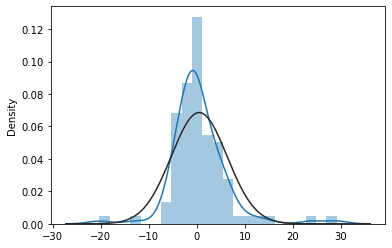

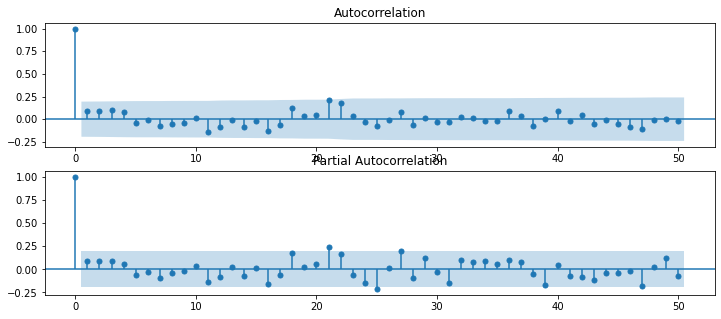

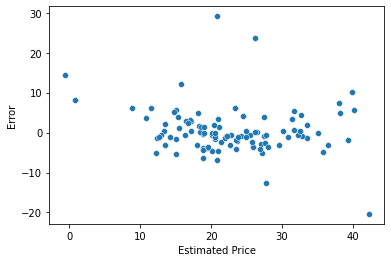

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.83,4.65,35.81,0.14
p-value,0.00,0.91,0.93,0.00
Alternative,nan,nan,nan,two-sided


In [77]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep1(df)
# df = prep2(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

scaler = preprocessing.MinMaxScaler()
# X_train, X_test = scale(scaler, X_train, X_test)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_test, pred_te_reg1, Resid_te_reg1, graph_on=True)

## Preprocessing(X) + Scaling(O)

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              665.9
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                   2.18e-257
Time:                        23:08:49   Log-Likelihood:                         -1225.8
No. Observations:                 404   AIC:                                      2478.
Df Residuals:                     391   BIC:                                      2530.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.6097      3.385     -2.839      0.005     -16.265      -2.955
ZN             3.6150      1.636      2.209      0.028       0.398       6.832
INDUS          4.0200      1.970      2.041      0.042       0.147       7.893
CHAS           1.1490      1.128      1.018      0.309      -1.069       3.367
NOX           -1.9859      2.149     -0.924      0.356      -6.211       2.240
RM            40.0652      1.779     22.524      0.000      36.568      43.562
AGE           -0.8179      1.474     -0.555      0.579      -3.717       2.081
DIS           -4.1004      2.273     -1.804      0.072      -8.569       0.368
RAD            4.5873      1.779      2.578      0.010       1.089       8.086
TAX           -6.3011      2.299     -2.741      0.006     -10.820      -1.782
PTRATIO       -4.6602      1.389     -3.356      0.001      -7.390      -1.930
B              9.9862      1.103      9.057      0.000       7.818      12.154
LSTAT         -3.9623      2.027     -1.955      0.051      -7.947       0.023
==============================================================================
Omnibus:                      219.783   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2796.791
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      15.244   Cond. No.                         23.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,3.29,25.29,18.35
Test,3.91,39.35,18.98


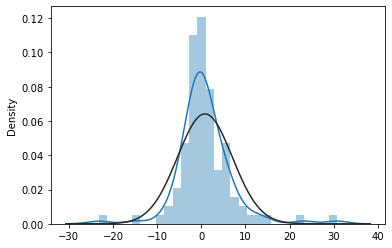

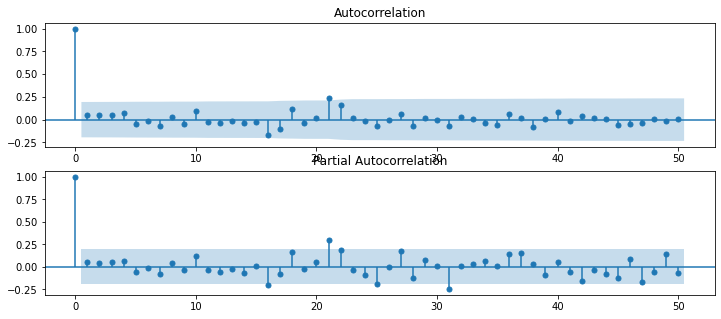

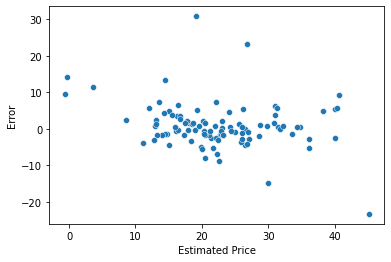

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.85,3.68,30.03,0.18
p-value,0.00,0.96,0.99,0.00
Alternative,nan,nan,nan,two-sided


In [78]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep1(df)
# df = prep2(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_test, pred_te_reg1, Resid_te_reg1, graph_on=True)

## Preprocessing(O) + Scaling(X)

(404, 18) (404, 1)
(102, 18) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.71e-105
Time:                        23:08:49   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1098      0.035     -3.122      0.002      -0.179      -0.041
ZN             0.0361      0.015      2.345      0.020       0.006       0.066
INDUS         -0.0393      0.072     -0.548      0.584      -0.180       0.102
NOX          -14.1708      4.451     -3.184      0.002     -22.922      -5.420
RM             6.2672      0.466     13.453      0.000       5.351       7.183
AGE           -0.0338      0.015     -2.294      0.022      -0.063      -0.005
DIS           -1.2884      0.226     -5.691      0.000      -1.733      -0.843
RAD            0.4776      0.185      2.586      0.010       0.114       0.841
PTRATIO       -0.8674      0.148     -5.874      0.000      -1.158      -0.577
B              0.0105      0.003      3.387      0.001       0.004       0.017
LSTAT         -0.2858      0.057     -5.010      0.000      -0.398      -0.174
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0.0      17.1128      6.061      2.824      0.005       5.197      29.029
CHAS_1.0      18.6594      6.201      3.009      0.003       6.468      30.850
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


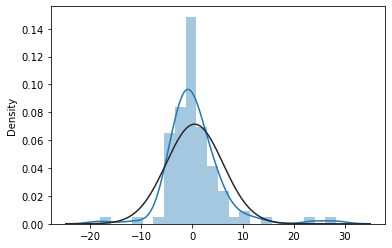

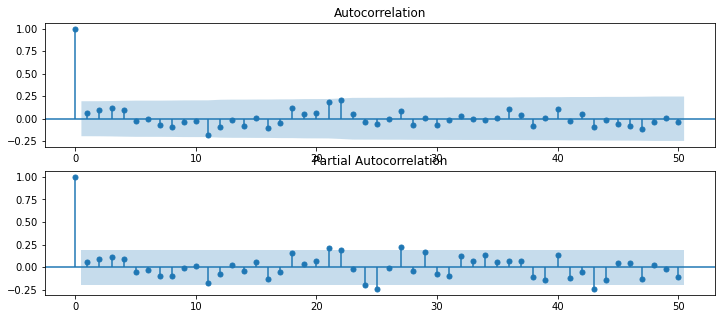

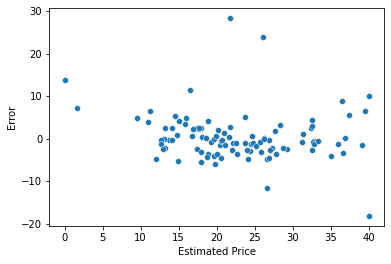

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.83,5.77,41.83,0.13
p-value,0.00,0.83,0.79,0.00
Alternative,nan,nan,nan,two-sided


In [79]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep1(df)
df = prep2(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

scaler = preprocessing.MinMaxScaler()
# X_train, X_test = scale(scaler, X_train, X_test)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_test, pred_te_reg1, Resid_te_reg1, graph_on=True)

## Preprocessing(O) + Scaling(O)

(404, 18) (404, 1)
(102, 18) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.71e-105
Time:                        23:08:50   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0.0      24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1.0      26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


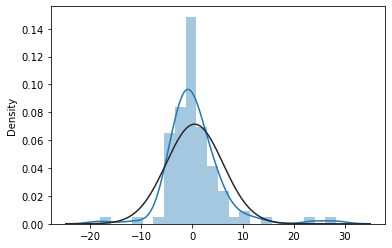

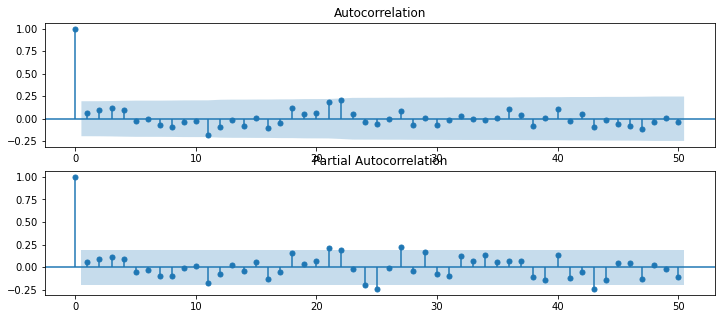

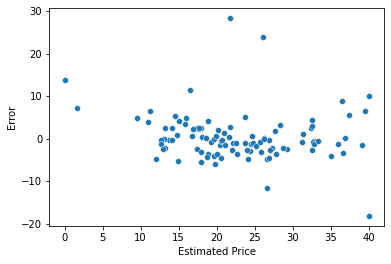

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.83,5.77,41.83,0.13
p-value,0.00,0.83,0.79,0.00
Alternative,nan,nan,nan,two-sided


In [80]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep1(df)
df = prep2(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

pred_tr_reg1 = algo_reg1.predict(X_train).values
pred_te_reg1 = algo_reg1.predict(X_test).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_test, pred_te_reg1, Resid_te_reg1, graph_on=True)